In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재 경로 확인
os.getcwd()

'D:\\Python\\machine_learning'

In [3]:
# 데이터 불러오기
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar : %d' % nCar, 'nVar : %d' % nVar)

nCar : 1436 nVar : 37


## 범주형 변수를 이진형 변수로 변환

In [5]:
# 가변수 생성
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [6]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# 연료타임에 대한 위치 인덱스를 저장
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [8]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [9]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1 # Petrol
dummy_d[d_idx] = 1 # Diesel
dummy_c[c_idx] = 1 # CNG

In [10]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가

In [11]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mir_data = pd.concat((corolla_, Fuel), 1)

In [12]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [13]:
mir_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [14]:
# bias 추가
mir_data = sm.add_constant(mir_data, has_constant='add')
mir_data.head()

C:\Users\THESF\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [15]:
feature_columns = list(mir_data.columns.difference(['Price']))
X = mir_data[feature_columns]
y = mir_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [16]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [18]:
fitted_full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     274.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:26:58   Log-Likelihood:                -8429.8
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     971   BIC:                         1.709e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -378.8700    132.721     -2.855      0.004    -639.322    -118.418
Age_08_04         -122.6952      4.079    -30.080      0.000    -130.700    -114.691
Airbag_1            56.5951    246.645      0.229      0.819    -427.424     540.614
Airbag_2            63.0248    134.076      0.470      0.638    -200.088     326.137
Airco              128.3066     92.660      1.385      0.166     -53.531     310.144
Automatic          450.2991    160.056      2.813      0.005     136.203     764.395
Automatic_airco   2303.0741    201.177     11.448      0.000    1908.283    2697.865
BOVAG_Guarantee    308.6124    129.523      2.383      0.017      54.436     562.789
Backseat_Divider  -232.0885    131.097     -1.770      0.077    -489.354      25.177
Boardcomputer     -232.9005    121.254     -1.921      0.055    -470.851       5.050
CD_Player          187.6042    106.206      1.766      0.078     -20.815     396.024
CNG              -1091.9770    265.121     -4.119      0.000   -1612.253    -571.701
Central_Lock       -38.2334    153.352     -0.249      0.803    -339.173     262.707
Cylinders           -0.0303      0.002    -13.255      0.000      -0.035      -0.026
Diesel             229.4749    196.146      1.170      0.242    -155.444     614.394
Doors               92.2668     42.083      2.192      0.029       9.683     174.851
Gears              324.8345    207.456      1.566      0.118     -82.279     731.948
Guarantee_Period    48.9978     14.993      3.268      0.001      19.575      78.421
HP                  22.3270      3.832      5.826      0.000      14.807      29.847
KM                  -0.0158      0.001    -12.104      0.000      -0.018      -0.013
Met_Color          -16.3803     78.705     -0.208      0.835    -170.831     138.070
Metallic_Rim       120.8896     97.969      1.234      0.218     -71.366     313.145
Mfg_Month          -93.9411     10.715     -8.768      0.000    -114.968     -72.915
Mfg_Year             2.8710      0.844      3.403      0.001       1.216       4.526
Mfr_Guarantee      195.1590     75.477      2.586      0.010      47.043     343.275
Mistlamps          -56.0390    114.652     -0.489      0.625    -281.032     168.954
Petrol             862.4945    216.741      3.979      0.000     437.160    1287.829
Power_Steering      -8.9159    287.366     -0.031      0.975    -572.847     555.015
Powered_Windows    451.6670    152.355      2.965      0.003     152.684     750.650
Quarterly_Tax       12.6605      1.958      6.468      0.000       8.819      16.502
Radio             1370.2507    784.377      1.747      0.081    -169.019    2909.521
Radio_cassette   -1545.9339    782.184     -1.976      0.048   -3080.899     -10.969
Sport_Model        311.3743     90.833      3.428      0.001     133.122     489.626
Tow_Bar           -195.

## VIF를 통한 다중공선성 확인

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(
mir_data.values, i) for i in range(mir_data.shape[1])]
vif['features'] = mir_data.columns
vif

C:\Users\THESF\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\THESF\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


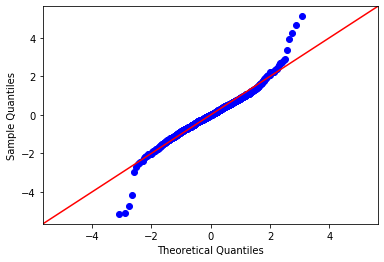

In [21]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid # residual
pred_y = fitted_full_model.predict(train_x)
# q-q plot 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

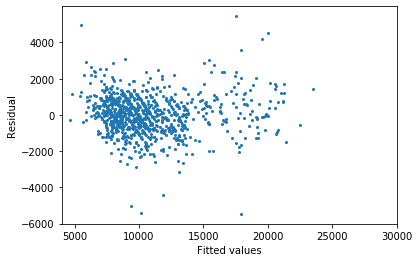

In [23]:
# residual pattern 확인
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [24]:
pred_y = fitted_full_model.predict(test_x) ## 검증 데이터에 대한 예측

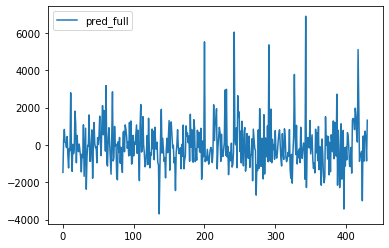

In [25]:
plt.plot(np.array(test_y - pred_y),label='pred_full')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_true = test_y, y_pred = pred_y)

1497310.8865856682

## 변수선택법

In [29]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # Modeling
    regr = model.fit() # 모델 학습
    AIC = regr.aic # 모델의 AIC
    return {'model': regr, "AIC":AIC}

print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0F146810>, 'AIC': 19063.324981666174}


In [30]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0xeb208f0>,
 'AIC': 16927.66824266861}

In [31]:
import time
import itertools
# getBest : 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo = (list(combo) + ['const'])
        
        results.append(processSubset(X,y,feature_set=combo)) # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], 'models on', k, "predictors in", (toc - tic), "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y, k=2))

Processed  630 models on 2 predictors in 0.9380009174346924 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17374.9
Name: 211, dtype: object


C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


In [32]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo) + ['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [33]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns = ['AIC','model'])
tic=time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print('Total elapsed time:', (toc-tic), "seconds.")

C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Processed  36 models on 1 predictors in 0.05807828903198242 seconds.
Processed  630 models on 2 predictors in 0.9229981899261475 seconds.
Processed  7140 models on 3 predictors in 11.210362195968628 seconds.
Total elapsed time: 12.419472932815552 seconds.


In [34]:
models

,AIC,model
1,17603.663463,<statsmodels.regression.linear_model.Regressio...
2,17374.911625,<statsmodels.regression.linear_model.Regressio...
3,17253.484411,<statsmodels.regression.linear_model.Regressio...


In [35]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2016.
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:48:56   Log-Likelihood:                -8622.7
No. Observations:                1005   AIC:                         1.725e+04
Df Residuals:                    1001   BIC:                         1.727e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Automatic_airco  3393.1019    204.329     16.606      0.000    2992.139    3794.065
KM                 -0.0143      0.001    -11.437      0.000      -0.017      -0.012
Mfg_Year         1627.6442     33.363     48.786      0.000    1562.175    1693.113
const           -3.243e+06   6.67e+04    -48.589      0.000   -3.37e+06   -3.11e+06
==============================================================================
Omnibus:                       89.143   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              520.709
Skew:                           0.077   Prob(JB):                    8.50e-114
Kurtosis:                       6.523   Cond. No.                     1.28e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# 모든 변수들 모델링 한것과 비교
print("full model Rsquared: ", "{:.5f}".format(fitted_full_model.rsquared))
print('full model AIC: ', "{:.5f}".format(fitted_full_model.aic))
print('full model MSE: ', "{:.5f}".format(fitted_full_model.mse_total))
print('selected model Rsquared: ', "{:.5f}".format(models.loc[3, 'model'].rsquared))
print('selected model AIC: ', "{:.5f}".format(models.loc[3, 'model'].aic))
print('selected model MSE: ', "{:.5f}".format(models.loc[3, 'model'].mse_total))

full model Rsquared:  0.90326
full model AIC:  16927.66824
full model MSE:  11694347.37550
selected model Rsquared:  0.85798
selected model AIC:  17253.48441
selected model MSE:  11694347.37550


C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':
C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the futu

Text(0, 0.5, 'BIC')

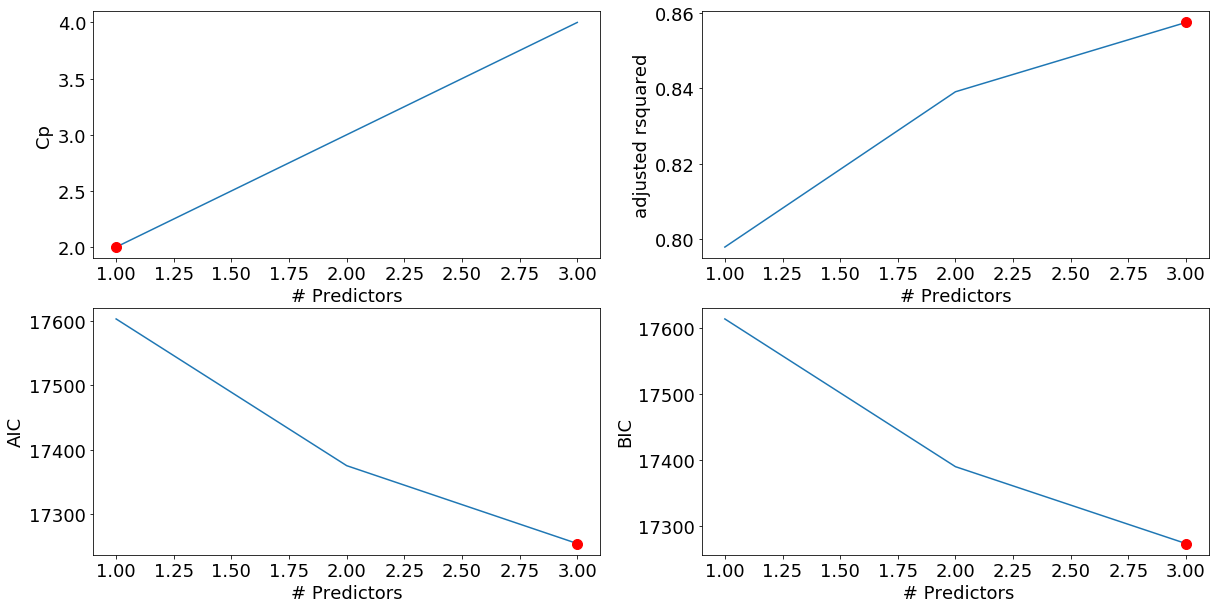

In [37]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

## 전진선택법

In [38]:
#### 전진선택법(step =1)
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) + 1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names, ' AIC:', best_model[0])
    return best_model

In [40]:
## 전진선택법 모델

def forward_model(X, y):
    Fmodels = pd.DataFrame(columns = ['AIC', "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names
        Fmodel_before = Fmodels.loc[i]['AIC']
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [41]:
Forward_best_model = forward_model(X=train_x, y=train_y)

C:\Users\THESF\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Processed  36 models on 1 predictors in 0.05807185173034668
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0FFBE770>
Processed  35 models on 3 predictors in 0.05599832534790039
Selected predictors: ['Mfg_Year', 'const', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0FFBE9B0>
Processed  34 models on 5 predictors in 0.054000139236450195
Selected predictors: ['Mfg_Year', 'const', 'Automatic_airco', 'const', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0FFBE9D0>
Processed  33 models on 7 predictors in 0.0630030632019043
Selected predictors: ['Mfg_Year', 'const', 'Automatic_airco', 'const', 'KM', 'const', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0FFD7EB0>
Processed  32 models on 9 predictors in 0.07299947738647461
Selected predictors: ['Mfg_Year', '

Processed  14 models on 45 predictors in 0.07300305366516113
Selected predictors: ['Mfg_Year', 'const', 'Automatic_airco', 'const', 'KM', 'const', 'Weight', 'const', 'HP', 'const', 'Powered_Windows', 'const', 'Quarterly_Tax', 'const', 'Petrol', 'const', 'Guarantee_Period', 'const', 'Sport_Model', 'const', 'Mfr_Guarantee', 'const', 'Diesel', 'const', 'ABS', 'const', 'Mfg_Month', 'const', 'Automatic', 'const', 'Tow_Bar', 'const', 'Doors', 'const', 'BOVAG_Guarantee', 'const', 'Boardcomputer', 'const', 'Radio_cassette', 'const', 'Gears', 'const', 'CD_Player', 'const', 'Radio', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0FFD7ED0>
Processed  13 models on 47 predictors in 0.08304977416992188
Selected predictors: ['Mfg_Year', 'const', 'Automatic_airco', 'const', 'KM', 'const', 'Weight', 'const', 'HP', 'const', 'Powered_Windows', 'const', 'Quarterly_Tax', 'const', 'Petrol', 'const', 'Guarantee_Period', 'const', 'Sport_Model', 'const', 'Mfr_Guarantee

In [42]:
Forward_best_model.aic

16913.87612498852

In [43]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     379.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:18:29   Log-Likelihood:                -8431.9
No. Observations:                1005   AIC:                         1.691e+04
Df Residuals:                     980   BIC:                         1.704e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1488.3155     47.608     31.262      0.000    1394.889    1581.742
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Automatic_airco   2275.5040    189.507     12.008      0.000    1903.619    2647.389
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
KM                  -0.0156      0.001    -12.093      0.000      -0.018      -0.013
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Weight               6.3684      1.268      5.024      0.000       3.881       8.856
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
HP                  23.0442      3.711      6.210      0.000      15.762      30.327
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Powered_Windows    472.3983     75.721      6.239      0.000     323.804     620.993
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Quarterly_Tax       12.5714      1.924      6.533      0.000       8.795      16.348
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Petrol            -2.26e+04    771.702    -29.282      0.000   -2.41e+04   -2.11e+04
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Guarantee_Period    47.4902     14.669      3.237      0.001      18.704      76.276
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Sport_Model        315.9643     88.482      3.571      0.000     142.328     489.600
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Mfr_Guarantee      190.0073     74.345      2.556      0.011      44.113     335.902
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Diesel           -2.323e+04    769.868    -30.171      0.000   -2.47e+04   -2.17e+04
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
ABS               -330.2083    102.360     -3.226      0.001    -531.078    -129.339
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Mfg_Month           30.3769     10.646      2.853      0.004       9.485      51.269
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Automatic          434.8757    157.897      2.754      0.006     125.021     744.731
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Tow_Bar           -190.5164     78.805     -2.418      0.016    -345.163     -35.870
const            -7.035e+04   2242.151    -31.377      0.000   -7.48e+04    -6.6e+04
Doors               91.0340     41.565      2.190      0.029       9.468     172.600
const            -7.035

## 후진소거법

In [44]:
### 후진선택법(step = 1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) -1, 'predictors in', (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_name, ' AIC:',best_model[0])
    return best_model

In [ ]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y=train_y, predictors = predictors)
        if Backward_Result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_results['AIC']
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print('Total elapsed time:', (toc-tic))